## Import requirements

In [4]:
# requirements:

import numpy as np
import os
import pathlib
import sys
import ipykernel
import numpy as np
import matplotlib.pyplot as plt

## The required class

1. BanditMachine
2. EpsilonGreedy


In [5]:
# class BanditMachine:

class BanditMachine:
    def __init__(self, n_arms):
        self.n_arms = n_arms  # 赌博机的臂数
        
        self.sigma = 2  # 所有臂的奖励标准差为1
        self.miu_list = np.random.normal(0, self.sigma, n_arms)  # 初始化每个臂的期望奖励为不同的值，均值为0
        self.counts = np.zeros(n_arms, dtype=int)  # 记录每个臂被拉动的次数
        self.values = np.zeros(n_arms)  # 记录每个臂的估计价值
        
    def update(self, arm, reward):
        """
        更新被拉动臂的信息
        :param arm: int, 臂的索引
        :param reward: float, 奖励
        """
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] = ((n - 1) / n) * value + (1 / n) * reward # 增量更新估计价值

    def play(self, arm):
        """
        拉动指定的臂
        :param arm: int, 臂的索引
        :return: float, 奖励
        """
        if arm < 0 or arm >= self.n_arms:
            raise ValueError("Arm index is out of range.")
        
        # 生成指定臂的奖励
        reward = np.random.normal(self.miu_list[arm], self.sigma)
        # 更新被拉动臂的信息
        self.update(arm, reward)
        return reward


In [6]:
# class EpsilonGreedy:

class EpsilonGreedy:
    def __init__(self, machines, epsilon):
        """
        :param machines: BanditMachine, 多臂赌博机的实例
        :param epsilon: float, 探索的概率
        """
        self.machines = machines
        self.epsilon = epsilon
        self.arms = machines.miu_list
        self.n_arms = len(self.arms)
        self.counts = np.zeros(self.n_arms, dtype=int)  # 记录每个动作被选择的次数
        self.values = np.zeros(self.n_arms, dtype=float)  # 记录每个动作的估计价值
        self.total_counts = 0  # 记录总共选择的次数

    def select_arm(self):
        # 先遍历一遍所有臂，如果有臂尚未被选择过，优先选择
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
        
        # 以概率 epsilon 随机选择一个臂，以概率 1 - epsilon 选择当前估计价值最高的臂
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        # 更新被选择动作的估计价值和被选择次数
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # 选择动作，获得奖励，更新估计
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


In [13]:
class UCB:
    def __init__(self, machines, c):
        """
        :param arms: list, 每个元素是一个BanditArm对象
        :param c: float, 探索因子
        """
        self.machines = machines
        self.c = c 
        self.arms = machines.miu_list # 赌博机的臂
        self.n_arms = len(self.arms) # 臂数
        self.counts = np.zeros(self.n_arms, dtype=int)  # 记录每个动作被选择的次数
        self.values = np.zeros(self.n_arms, dtype=float)  # 记录每个动作的估计价值
        self.total_counts = 0 # 记录总共选择的次数

    def select_arm(self):
        # 如果有臂尚未被选择过，优先选择
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                return i
        
        
        # 选择ucb值最大的动作
        ucb_values = self.values + self.c * np.sqrt(np.log(self.total_counts) / (self.counts + 1))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # 更新被选择动作的估计价值和被选择次数
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # 选择动作，获得奖励，更新估计
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


## Test bandit base

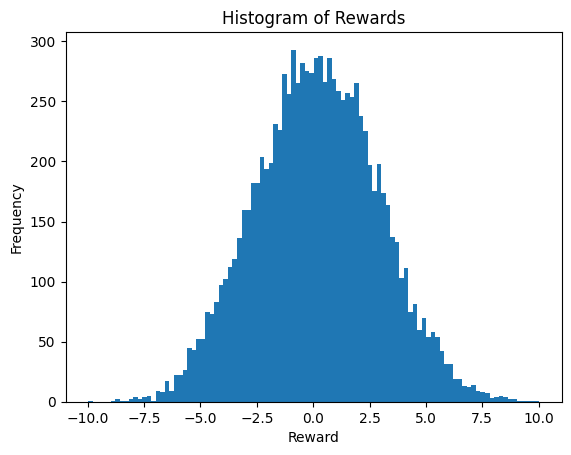

Average Reward: 0.17988060062850408


In [3]:
# 测试 k_arm_bandit_base.py 中的 BanditArm 类

# 1. 测试 BanditArm 类的初始化
arm = BanditMachine(10)

rewards = []
for arm_i in range(10):
    for _ in range(1000):
        reward = arm.play(arm_i)
        rewards.append(reward)

average_reward = np.mean(rewards)


plt.hist(rewards, bins=100)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards')
plt.show()

print("Average Reward:", average_reward)


## Test Epsilon Greedy

In [7]:
# 初始化多臂老虎机
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  0.1156993540956208
arm:  1 miu:  1.688670753678951
arm:  2 miu:  -3.799282971360523
arm:  3 miu:  -4.7640007344387385
arm:  4 miu:  -3.283172504946025
arm:  5 miu:  1.4000401007957277
arm:  6 miu:  1.3898375187231766
arm:  7 miu:  2.82205801754809
arm:  8 miu:  4.610502855497813
arm:  9 miu:  -1.845643505913994


In [8]:
bandits.miu_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
# bandits.miu_list = [-1, 1]

for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  -1
arm:  1 miu:  -1
arm:  2 miu:  -1
arm:  3 miu:  -1
arm:  4 miu:  -1
arm:  5 miu:  -1
arm:  6 miu:  -1
arm:  7 miu:  -1
arm:  8 miu:  -1
arm:  9 miu:  1


chosen_arm:  0 reward:  0.12999416706583933
chosen_arm:  1 reward:  0.9700147028179231
chosen_arm:  2 reward:  2.6579069157472253
chosen_arm:  3 reward:  0.8060545269909694
chosen_arm:  4 reward:  -1.0462021819310623
chosen_arm:  5 reward:  1.2069324761487694
chosen_arm:  6 reward:  -2.3487618971191697
chosen_arm:  7 reward:  1.4156185615192078
chosen_arm:  8 reward:  -2.763392143664328
chosen_arm:  9 reward:  3.525352772541374
chosen_arm:  9 reward:  5.620721611771453
chosen_arm:  9 reward:  -0.5765177718635677
chosen_arm:  9 reward:  -3.178911537515696
chosen_arm:  2 reward:  -0.813296327896304
chosen_arm:  7 reward:  -3.5373988883404937
chosen_arm:  9 reward:  -0.9243222091692855
chosen_arm:  5 reward:  -0.1581866009719104
chosen_arm:  1 reward:  -1.3137951428636319
chosen_arm:  4 reward:  -3.7223036196962487
chosen_arm:  2 reward:  0.9673039436079747
chosen_arm:  2 reward:  3.1252406223014697
chosen_arm:  7 reward:  1.050113961238719
chosen_arm:  2 reward:  -1.3360572235198973
chos

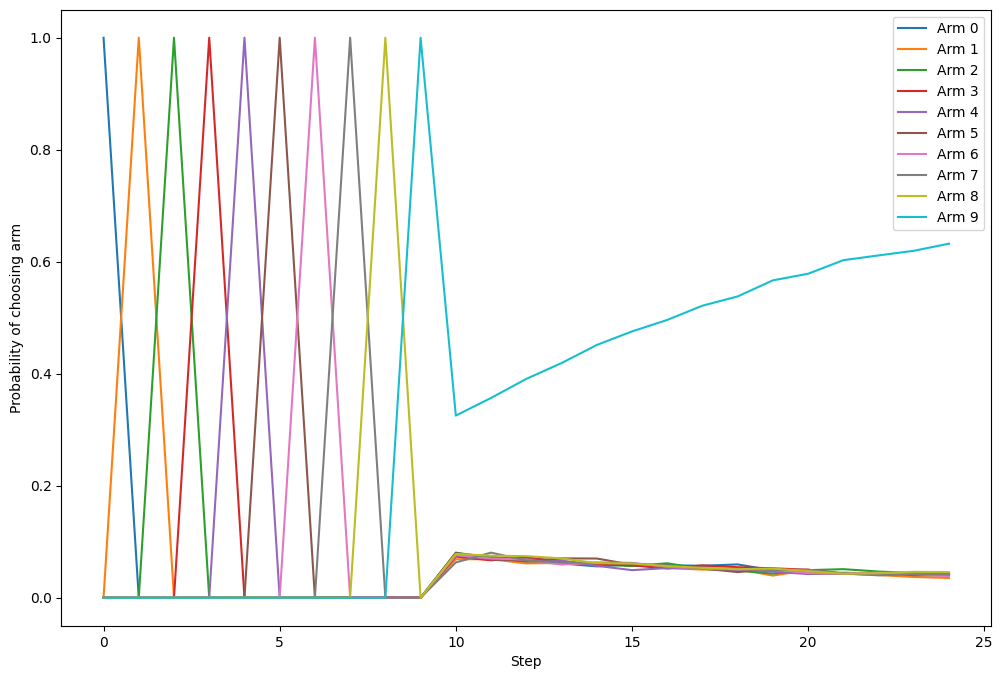

In [9]:
# initial Episilon-greedy agent
e = 0.1
e_greedy_bandits = EpsilonGreedy(bandits, e)

# play 25 times
for _ in range(25):
    chosen_arm, reward = e_greedy_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)

# 初始化 Epsilon-greedy 算法
e = 0.0
# e_greedy_bandits = EpsilonGreedy(bandits, e)

# 初始化 轮数
total_rounds = 4000

# 初始化 每轮运行的步数
total_steps = 25

# 用于记录每一步每个臂被选择的次数
arm_counts = np.zeros((total_steps, bandits.n_arms))

# 运行 Epsilon-Greedy 算法 100 遍
for _ in range(total_rounds):
    e_greedy_bandits = EpsilonGreedy(bandits, e)  # 为每轮运行重新初始化
    for step in range(total_steps):
        chosen_arm, _ = e_greedy_bandits.play()
        arm_counts[step, chosen_arm] += 1

# 将次数转换为概率
arm_probabilities = arm_counts / total_rounds

# 输出第11步的每个臂的概率值
step = 10  # 第11步对应的索引是10（从0开始计数）
print(f"Probabilities of selecting each arm at step {step + 1}:")
for arm in range(bandits.n_arms):
    print(f"Arm {arm}: {arm_probabilities[step, arm]}")

# 绘制每一步选择每个臂的概率
plt.figure(figsize=(12, 8))
for arm in range(bandits.n_arms):
    plt.plot(arm_probabilities[:, arm], label=f'Arm {arm}')
plt.xlabel('Step')
plt.ylabel('Probability of choosing arm')
plt.legend()
plt.show()

## Test UCB

In [11]:
# 初始化多臂老虎机
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  0.6123768165405686
arm:  1 miu:  0.4582552484588526
arm:  2 miu:  2.123587160693128
arm:  3 miu:  -0.4803325555304206
arm:  4 miu:  2.094550292819023
arm:  5 miu:  1.4367091008269341
arm:  6 miu:  0.3111415673798879
arm:  7 miu:  -1.729100214325768
arm:  8 miu:  -1.4488239137117787
arm:  9 miu:  -0.6829540443975144


In [14]:
# 初始化 UCB 算法
c = 1.5
ucb_bandits = UCB(bandits, c)

# 运行UCB算法
for _ in range(25):
    chosen_arm, reward = ucb_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)

chosen_arm:  0 reward:  -1.0206797913161951
chosen_arm:  1 reward:  -1.887269391096719
chosen_arm:  2 reward:  -0.6299678956408545
chosen_arm:  3 reward:  0.8887797480622943
chosen_arm:  4 reward:  1.3472652409719257
chosen_arm:  5 reward:  0.054135034437119645
chosen_arm:  6 reward:  2.501967536408331
chosen_arm:  7 reward:  2.8129636303424683
chosen_arm:  8 reward:  6.257594802096808
chosen_arm:  9 reward:  -3.323447906094713
chosen_arm:  8 reward:  -3.0893572392898037
chosen_arm:  7 reward:  -1.7780636285495302
chosen_arm:  6 reward:  -2.252976939443388
chosen_arm:  4 reward:  2.7916835026529543
chosen_arm:  4 reward:  3.477140039086967
chosen_arm:  4 reward:  8.863462896927992
chosen_arm:  4 reward:  4.925337887970533
chosen_arm:  4 reward:  2.476555050700586
chosen_arm:  4 reward:  4.181353851551476
chosen_arm:  4 reward:  0.5540966308609783
chosen_arm:  4 reward:  2.050888391660996
chosen_arm:  4 reward:  5.751949616745721
chosen_arm:  4 reward:  5.690310373631819
chosen_arm:  4 

## Visualization

raw mean= [ 0.012 -0.014  0.037 -0.027 -0.002 -0.024  0.013  0.04   0.005  0.01 ]
expected average return= [-0.232 -0.369 -0.1   -1.079 -1.238 -1.062  1.322 -0.235  0.341 -0.48 ]
actual mean= [-0.22  -0.383 -0.063 -1.106 -1.24  -1.085  1.335 -0.195  0.346 -0.47 ]


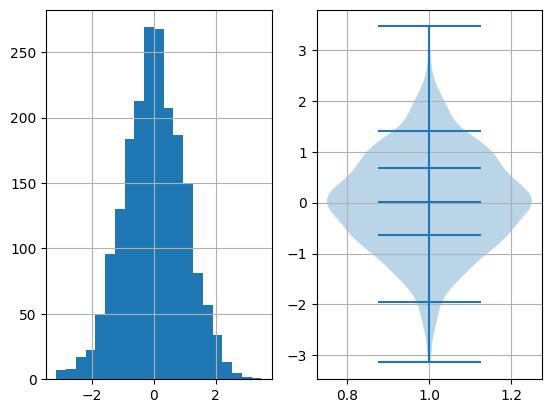

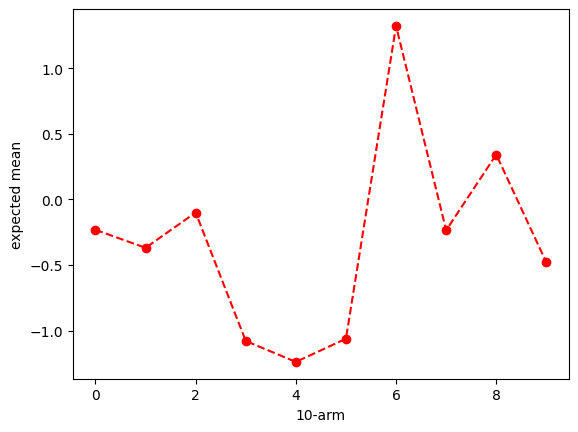

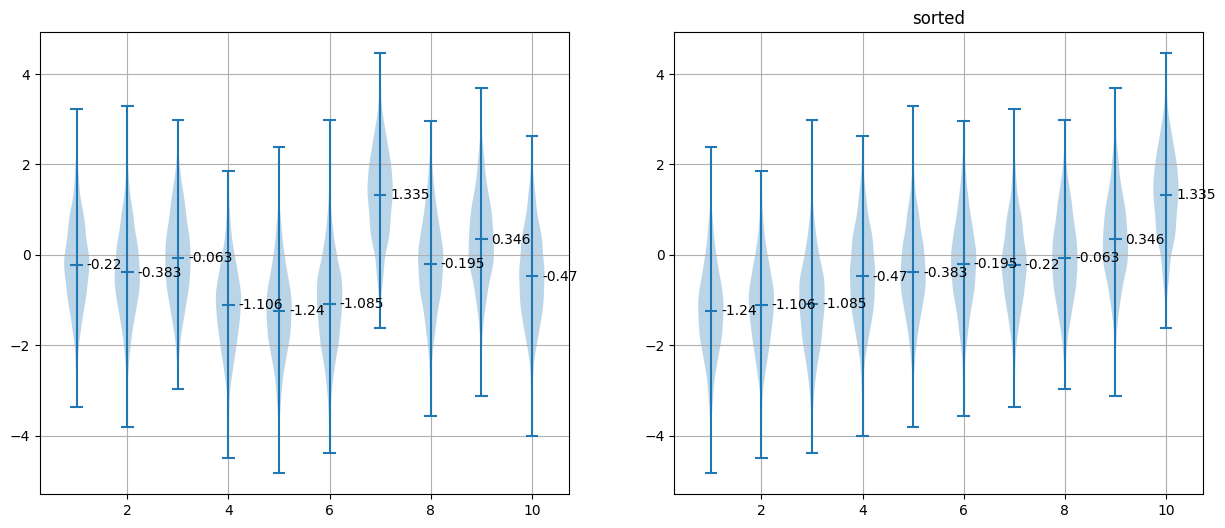

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def draw_one_arm(reward_dist):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes[0]
    ax.grid()
    ax.hist(reward_dist, bins=21)

    ax = axes[1]
    ax.grid()
    ax.violinplot(
        reward_dist,
        showmeans=True,
        quantiles=[0, 0.025, 0.25, 0.75, 0.925]
    )

    return fig, axes


def draw_mu(reward_mu):
    fig, ax = plt.subplots()
    ax.plot(reward_mu, 'ro--')
    ax.set_xlabel(u"10-arm")
    ax.set_ylabel(u"expected mean")
    return fig, ax


def draw_k_arm(k_reward_dist_mu, k_reward_dist_mu_sort):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    ax = axes[0]
    ax.grid()
    ax.violinplot(k_reward_dist_mu, showmeans=True)
    mean = np.round(np.mean(k_reward_dist_mu, axis=0), 3)
    for i in range(10):
        ax.text(i + 1 + 0.2, mean[i] - 0.1, str(mean[i]))

    ax = axes[1]
    ax.grid()
    ax.violinplot(k_reward_dist_mu_sort, showmeans=True)
    mean = np.round(np.mean(k_reward_dist_mu_sort, axis=0), 3)
    for i in range(10):
        ax.text(i + 1 + 0.2, mean[i] - 0.1, str(mean[i]))

    ax.set_title('sorted')

    return fig, axes


if __name__ == "__main__":

    num_arm = 10
    num_data = 2000
    # random seed, type a int value to fix results, or it'll be random
    # np.random.seed(5)
    # random arm's distribution
    k_reward_dist = np.random.randn(num_data, num_arm)
    print("raw mean=", np.round(np.mean(k_reward_dist, axis=0), 3))
    fig1, _ = draw_one_arm(k_reward_dist[:, 0])
    # 10 arms' mu
    reward_mu = np.random.randn(num_arm)
    print("expected average return=", np.round(reward_mu, 3))
    fig2, _ = draw_mu(reward_mu)
    # 10 arms' distribution in violin
    k_reward_dist_mu = reward_mu + k_reward_dist
    print("actual mean=", np.round(np.mean(k_reward_dist_mu, axis=0), 3))
    # sort fig
    reward_mu_sort_arg = np.argsort(reward_mu)
    k_reward_dist_mu_sort = np.zeros_like(k_reward_dist_mu)
    for i in range(10):
        idx = reward_mu_sort_arg[i]  # i-th arm for idx
        k_reward_dist_mu_sort[:, i] = k_reward_dist_mu[:, idx]

    fig3, _ = draw_k_arm(k_reward_dist_mu, k_reward_dist_mu_sort)

    plt.show()